In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import folium

In [40]:
raw = pd.read_csv("public data contest/JJ clinic.csv", encoding = 'cp949')
raw

,사업장명,인허가일자,상세영업상태명,소재지전화,도로명주소,지번주소,위도,경도,업태구분명,의료기관종별명,의료인수,입원실수,병상수,총면적,진료과목내용명,데이터기준일자
0,(사)대한산업보건협회전북산업보건센타 전북의원,1989-06-03,영업중,063-225-1242,전라북도 전주시 덕진구 기린대로 1030 (여의동),전라북도 전주시 덕진구 여의동 654-1,35.868399,127.073888,의원,의원,32,0,0,1468.00,내과+외과+흉부외과+영상의학과+직업환경의학과,2022-06-30
1,(사)인구보건복지협회전북지회가족보건의원,1974-01-16,영업중,063-240-2345,전라북도 전주시 덕진구 백제대로 720 (인후동2가),전라북도 전주시 덕진구 인후동2가 1557-1,35.844851,127.147732,의원,의원,10,4,17,1493.56,내과+산부인과+소아청소년과+영상의학과+진단검사의학과+가정의학과,2022-06-30
2,(사)인구보건복지협회전북지회가족치과의원,2007-11-23,영업중,063-240-2331,전라북도 전주시 덕진구 백제대로 720 (인후동2가),전라북도 전주시 덕진구 인후동2가 1557-1,35.844851,127.147732,치과의원,치과의원,13,0,0,120.00,치과+예방치과,2022-06-30
3,(사)한국건강관리협회 건강치과의원,2013-05-02,영업중,063-259-8896,"전라북도 전주시 덕진구 사평로 40, 5층 (덕진동1가, 건강검진센터)",전라북도 전주시 덕진구 덕진동1가 1408-3,35.841159,127.121621,치과의원,치과의원,2,0,0,146.00,치과,2022-06-30
4,(사)한국건강관리협회건강증진의원,1982-12-10,영업중,063-259-8900,전라북도 전주시 덕진구 사평로 40 (덕진동1가),전라북도 전주시 덕진구 덕진동1가 1408-3,35.841159,127.121621,의원,의원,44,2,18,4907.79,내과+외과+산부인과+영상의학과+진단검사의학과,2022-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,휴먼사랑한의원,2010-08-23,영업중,063-221-1567,전라북도 전주시 완산구 호암로 17 (효자동2가),전라북도 전주시 완산구 효자동2가 1313-8,35.809128,127.096515,한의원,한의원,1,0,0,140.15,한방내과+한방부인과+한방소아과+한방안·이비인후·피부과+한방신경정신과+한방재활의학과+...,2022-06-30
1001,휴먼치과의원,2010-04-16,영업중,063-223-9003,전라북도 전주시 완산구 서원로 66 (효자동2가),전라북도 전주시 완산구 효자동2가 1246-14,35.813389,127.101638,치과의원,치과의원,1,0,0,157.06,치과,2022-06-30
1002,휴부부치과의원,2016-07-28,영업중,063-227-2275,전라북도 전주시 완산구 세내로 548 (효자동3가),전라북도 전주시 완산구 효자동3가 1456-7,35.834168,127.099547,치과의원,치과의원,1,0,0,195.94,구강악안면외과+치과보철과+치과교정과+소아치과+치주과+치과보존과+구강내과,2022-06-30
1003,희망가정의학과의원,2009-04-28,영업중,063-241-8277,전라북도 전주시 완산구 장승배기로 364 (서서학동),전라북도 전주시 완산구 서서학동 295,35.803831,127.149659,의원,의원,1,0,0,396.43,내과+외과+정형외과+소아청소년과+안과+이비인후과+피부과+비뇨의학과+가정의학과,2022-06-30


In [41]:
sum(raw["업태구분명"] != raw["의료기관종별명"])    # 두 컬럼의 값이 완벽하게 일치함을 확인.

0

In [42]:
sum (raw["데이터기준일자"] != '2022-06-30' )     #데이터 기준 일자가 모두 2022년 6월 30일임을 확인 

0

In [43]:
sum (raw["상세영업상태명"] != '영업중' )          #상세영업상태명가 모두 영업중임을 확인 

0

In [44]:
df = raw.drop(['업태구분명', '데이터기준일자', '상세영업상태명','지번주소'], axis=1)
df

,사업장명,인허가일자,소재지전화,도로명주소,위도,경도,의료기관종별명,의료인수,입원실수,병상수,총면적,진료과목내용명
0,(사)대한산업보건협회전북산업보건센타 전북의원,1989-06-03,063-225-1242,전라북도 전주시 덕진구 기린대로 1030 (여의동),35.868399,127.073888,의원,32,0,0,1468.00,내과+외과+흉부외과+영상의학과+직업환경의학과
1,(사)인구보건복지협회전북지회가족보건의원,1974-01-16,063-240-2345,전라북도 전주시 덕진구 백제대로 720 (인후동2가),35.844851,127.147732,의원,10,4,17,1493.56,내과+산부인과+소아청소년과+영상의학과+진단검사의학과+가정의학과
2,(사)인구보건복지협회전북지회가족치과의원,2007-11-23,063-240-2331,전라북도 전주시 덕진구 백제대로 720 (인후동2가),35.844851,127.147732,치과의원,13,0,0,120.00,치과+예방치과
3,(사)한국건강관리협회 건강치과의원,2013-05-02,063-259-8896,"전라북도 전주시 덕진구 사평로 40, 5층 (덕진동1가, 건강검진센터)",35.841159,127.121621,치과의원,2,0,0,146.00,치과
4,(사)한국건강관리협회건강증진의원,1982-12-10,063-259-8900,전라북도 전주시 덕진구 사평로 40 (덕진동1가),35.841159,127.121621,의원,44,2,18,4907.79,내과+외과+산부인과+영상의학과+진단검사의학과
...,...,...,...,...,...,...,...,...,...,...,...,...
1000,휴먼사랑한의원,2010-08-23,063-221-1567,전라북도 전주시 완산구 호암로 17 (효자동2가),35.809128,127.096515,한의원,1,0,0,140.15,한방내과+한방부인과+한방소아과+한방안·이비인후·피부과+한방신경정신과+한방재활의학과+...
1001,휴먼치과의원,2010-04-16,063-223-9003,전라북도 전주시 완산구 서원로 66 (효자동2가),35.813389,127.101638,치과의원,1,0,0,157.06,치과
1002,휴부부치과의원,2016-07-28,063-227-2275,전라북도 전주시 완산구 세내로 548 (효자동3가),35.834168,127.099547,치과의원,1,0,0,195.94,구강악안면외과+치과보철과+치과교정과+소아치과+치주과+치과보존과+구강내과
1003,희망가정의학과의원,2009-04-28,063-241-8277,전라북도 전주시 완산구 장승배기로 364 (서서학동),35.803831,127.149659,의원,1,0,0,396.43,내과+외과+정형외과+소아청소년과+안과+이비인후과+피부과+비뇨의학과+가정의학과


In [152]:
df["진료과목내용명"].str.split("+",expand=True)   #진료과목 분리 확인 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,내과,외과,흉부외과,영상의학과,직업환경의학과,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,내과,산부인과,소아청소년과,영상의학과,진단검사의학과,가정의학과,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,내과,외과,산부인과,영상의학과,진단검사의학과,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,비뇨의학과,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,마취통증의학과,산부인과,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,내과,외과,소아청소년과,안과,이비인후과,피부과,비뇨의학과,None,None,None,None,None,None,None,None,None,None,None,None,None
511,내과,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
512,내과,정형외과,신경외과,마취통증의학과,소아청소년과,이비인후과,피부과,비뇨의학과,가정의학과,None,None,None,None,None,None,None,None,None,None,None
513,내과,정형외과,신경외과,마취통증의학과,이비인후과,비뇨의학과,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [45]:
df["도로명주소"].str.split(" ",expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,전라북도,전주시,덕진구,기린대로,1030,(여의동),None,None,None,None,None,None,None,None
1,전라북도,전주시,덕진구,백제대로,720,(인후동2가),None,None,None,None,None,None,None,None
2,전라북도,전주시,덕진구,백제대로,720,(인후동2가),None,None,None,None,None,None,None,None
3,전라북도,전주시,덕진구,사평로,"40,",5층,"(덕진동1가,",건강검진센터),None,None,None,None,None,None
4,전라북도,전주시,덕진구,사평로,40,(덕진동1가),None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,전라북도,전주시,완산구,호암로,17,(효자동2가),None,None,None,None,None,None,None,None
1001,전라북도,전주시,완산구,서원로,66,(효자동2가),None,None,None,None,None,None,None,None
1002,전라북도,전주시,완산구,세내로,548,(효자동3가),None,None,None,None,None,None,None,None
1003,전라북도,전주시,완산구,장승배기로,364,(서서학동),None,None,None,None,None,None,None,None


덕진구에 있는 의원만 추출

df_dj = df.loc[df["도로명주소"].str.split(" ",expand=True)[2] == "덕진구"]
df_dj

In [ ]:
df = df[df.의료기관종별명 != '한의원']
df = df[df.의료기관종별명 != '치과의원']
df = df.reset_index().drop(['index'], axis=1)

df[df['진료과목내용명'].str.contains('피부과', na = False)].index

In [174]:
dfresult = df[~df['진료과목내용명'].str.contains("피부과", na=False, case=False)]
df = dfresult[~dfresult['진료과목내용명'].str.contains("성형외과", na=False, case=False)]
df

,사업장명,인허가일자,소재지전화,도로명주소,위도,경도,의료기관종별명,의료인수,입원실수,병상수,총면적,진료과목내용명
0,(사)대한산업보건협회전북산업보건센타 전북의원,1989-06-03,063-225-1242,전라북도 전주시 덕진구 기린대로 1030 (여의동),35.868399,127.073888,의원,32,0,0,1468.00,내과+외과+흉부외과+영상의학과+직업환경의학과
1,(사)인구보건복지협회전북지회가족보건의원,1974-01-16,063-240-2345,전라북도 전주시 덕진구 백제대로 720 (인후동2가),35.844851,127.147732,의원,10,4,17,1493.56,내과+산부인과+소아청소년과+영상의학과+진단검사의학과+가정의학과
2,(사)한국건강관리협회건강증진의원,1982-12-10,063-259-8900,전라북도 전주시 덕진구 사평로 40 (덕진동1가),35.841159,127.121621,의원,44,2,18,4907.79,내과+외과+산부인과+영상의학과+진단검사의학과
3,PSI한솔비뇨기과의원,2016-01-20,063-227-7575,"전라북도 전주시 완산구 백제대로 250, 3,4층 (중화산동2가)",35.815361,127.123439,의원,4,4,6,667.78,비뇨의학과
4,가온의료소비자생활협동조합 세나여성의원,2002-11-30,063-229-8245,전라북도 전주시 완산구 소대배기로 14 (평화동2가),35.787132,127.131635,의원,4,26,29,2125.92,마취통증의학과+산부인과
...,...,...,...,...,...,...,...,...,...,...,...,...
507,효자비뇨기과의원,2004-05-06,063-222-0075,"전라북도 전주시 완산구 용머리로 57, 201호 (효자동1가)",35.806944,127.116326,의원,1,0,0,0.00,비뇨의학과
508,효자산부인과의원,1999-07-14,063-223-6888,전라북도 전주시 완산구 백제대로 137 (효자동1가),35.805088,127.123126,의원,3,0,0,377.71,산부인과
509,효자이비인후과의원,1993-04-20,063-223-7112,전라북도 전주시 완산구 용머리로 110 (효자동1가),35.805759,127.122091,의원,1,0,0,329.00,이비인후과
511,효천연합내과의원,2019-11-04,NaN,"전라북도 전주시 완산구 천잠로 164, 송민빌딩 2층 (효자동2가)",35.802419,127.099302,의원,3,0,0,492.15,내과


m = folium.Map([36,128],zoom_start=7,scrollWheelZoom=False)
choro = folium.Choropleth(
    data = _df, 
    geo_data= global_dict, 
    columns=['prov','prop'],
    key_on = 'feature.properties.name'
)
choro.add_to(m)   

In [149]:
m = folium.Map([35.84195368311022, 127.1155556693179],zoom_start=14,scrollWheelZoom=False)

In [55]:
df_dj.loc[1,["위도", "경도"]]

위도     35.844851
경도    127.147732
Name: 1, dtype: object

In [57]:
for i in range(len(df)):
    folium.Marker([df.iloc[i][4], df.iloc[i][5]], popup=df.index[i]).add_to(m)

In [58]:
m

### 전주 경계선 표시하기

In [117]:
import folium 
import pandas as pd 
import json 
import requests 

In [123]:
local_distriction_jsonurl='https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-municipalities-2018-geo.json'
local_dict = json.loads(requests.get(local_distriction_jsonurl).text)
_features = local_dict['features']
_lst =[_features[i]['properties']['name'] for i in range(250)]
[_lst.index(keyword) for keyword in ['전주시완산구','전주시덕진구']]

local_dict2 = local_dict.copy()

In [124]:
_keywords=['전주시완산구','전주시덕진구']
_jj = [_lst.index(keyword) for keyword in _keywords] 
local_dict2['features'] = [local_dict['features'][j] for j in _jj]

In [136]:
m = folium.Map([35.84195368311022, 127.1155556693179],zoom_start=12.5,scrollWheelZoom=False)
tiles = "CartoDB positron"
folium.Choropleth(geo_data=local_dict2).add_to(m)
folium.TileLayer(tiles=tiles).add_to(m)
m

In [175]:
m = folium.Map([35.84195368311022, 127.1155556693179],zoom_start=12.5,scrollWheelZoom=False)
tiles = "CartoDB positron"
folium.Choropleth(geo_data=local_dict2).add_to(m)
folium.TileLayer(tiles=tiles).add_to(m)
for i in range(len(df)):
    folium.Marker([df.iloc[i][4], df.iloc[i][5]], popup=df.index[i],  icon= folium.Icon(color='red')).add_to(m)
m

# 2차병원, 3차병원 ( hospital )  

In [143]:
hospital = pd.read_csv("public data contest/JJ hospital .csv", encoding = 'cp949')
hospital

,사업장명,인허가일자,상세영업상태명,소재지전화,도로명주소,지번주소,위도,경도,업태구분명,의료기관종별명,의료인수,입원실수,병상수,총면적,진료과목내용명,데이터기준일자
0,가람한방병원,2014-04-30,영업중,063-270-8600,"전라북도 전주시 덕진구 송천중앙로 60, 3~6층 (송천동1가)",전라북도 전주시 덕진구 송천동1가 270-1,35.852438,127.120224,한방병원,한방병원,4,31,83,1530.26,가정의학과+한방내과+한방부인과+한방소아과+한방안·이비인후·피부과+한방신경정신과+한방...,2022-06-30
1,나은요양병원,2012-06-26,영업중,063-715-2300,전라북도 전주시 덕진구 기린대로 951 (여의동),전라북도 전주시 덕진구 여의동 558-4,35.864427,127.080650,요양병원(일반요양병원),요양병원(일반요양병원),23,37,210,4311.40,내과+외과+가정의학과+한방내과+침구과,2022-06-30
2,누가한방병원,2009-11-04,영업중,063-252-9111,전라북도 전주시 덕진구 안덕원로 218 (인후동1가),전라북도 전주시 덕진구 인후동1가 594-14,35.835934,127.150924,한방병원,한방병원,3,18,84,1476.70,마취통증의학과+한방내과+한방부인과+한방소아과+한방안·이비인후·피부과+한방신경정신과+...,2022-06-30
3,다사랑병원,2005-03-16,영업중,063-228-5540,전라북도 전주시 완산구 백제대로 74 (삼천동1가),전라북도 전주시 완산구 삼천동1가 732-3,35.800878,127.127854,병원,병원,9,32,94,2379.94,내과+외과+정형외과+소아청소년과+응급의학과,2022-06-30
4,다생한방병원,2018-06-25,영업중,063-714-2000,"전라북도 전주시 덕진구 벚꽃로 48, 0동 (진북동,참조은병원)",전라북도 전주시 덕진구 진북동 1021-2,35.828807,127.134791,한방병원,한방병원,0,28,60,2160.53,가정의학과+한방내과+한방부인과+한방소아과+한방안·이비인후·피부과+한방신경정신과+한방...,2022-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,효사랑가족요양병원,2007-06-11,영업중,063-711-1111,전라북도 전주시 완산구 용머리로 77 (효자동1가),전라북도 전주시 완산구 효자동1가 292,35.806705,127.118834,요양병원(일반요양병원),요양병원(일반요양병원),55,164,793,23025.60,내과+외과+정형외과+재활의학과+가정의학과+한방내과+한방부인과+한방소아과+한방안·이비...,2022-06-30
90,효사랑전주요양병원,2006-05-26,영업중,063-278-8288,전라북도 전주시 완산구 팔달로 272 (서노송동),전라북도 전주시 완산구 서노송동 649-5,35.826439,127.144105,요양병원(일반요양병원),요양병원(일반요양병원),41,53,314,7172.00,내과+재활의학과+가정의학과+한방내과+한방부인과+한방소아과+한방안·이비인후·피부과+한...,2022-06-30
91,효성의료재단 새전주요양병원,2013-09-04,영업중,063-213-8275,전라북도 전주시 덕진구 여암1길 37 (여의동),전라북도 전주시 덕진구 여의동 626-2,35.870011,127.073178,요양병원(일반요양병원),요양병원(일반요양병원),21,32,188,4127.58,외과+가정의학과+한방내과+침구과,2022-06-30
92,효천한방병원,2019-08-28,영업중,063-274-0365,전라북도 전주시 완산구 쑥고개로 331 (효자동2가),전라북도 전주시 완산구 효자동2가 1214-10,35.802920,127.101365,한방병원,한방병원,20,22,72,1341.98,가정의학과+한방내과+한방부인과+한방소아과+한방안·이비인후·피부과+한방신경정신과+한방...,2022-06-30


In [144]:
df1 = hospital.drop(['업태구분명', '데이터기준일자', '상세영업상태명', '지번주소'], axis=1)
df1

,사업장명,인허가일자,소재지전화,도로명주소,위도,경도,의료기관종별명,의료인수,입원실수,병상수,총면적,진료과목내용명
0,가람한방병원,2014-04-30,063-270-8600,"전라북도 전주시 덕진구 송천중앙로 60, 3~6층 (송천동1가)",35.852438,127.120224,한방병원,4,31,83,1530.26,가정의학과+한방내과+한방부인과+한방소아과+한방안·이비인후·피부과+한방신경정신과+한방...
1,나은요양병원,2012-06-26,063-715-2300,전라북도 전주시 덕진구 기린대로 951 (여의동),35.864427,127.080650,요양병원(일반요양병원),23,37,210,4311.40,내과+외과+가정의학과+한방내과+침구과
2,누가한방병원,2009-11-04,063-252-9111,전라북도 전주시 덕진구 안덕원로 218 (인후동1가),35.835934,127.150924,한방병원,3,18,84,1476.70,마취통증의학과+한방내과+한방부인과+한방소아과+한방안·이비인후·피부과+한방신경정신과+...
3,다사랑병원,2005-03-16,063-228-5540,전라북도 전주시 완산구 백제대로 74 (삼천동1가),35.800878,127.127854,병원,9,32,94,2379.94,내과+외과+정형외과+소아청소년과+응급의학과
4,다생한방병원,2018-06-25,063-714-2000,"전라북도 전주시 덕진구 벚꽃로 48, 0동 (진북동,참조은병원)",35.828807,127.134791,한방병원,0,28,60,2160.53,가정의학과+한방내과+한방부인과+한방소아과+한방안·이비인후·피부과+한방신경정신과+한방...
...,...,...,...,...,...,...,...,...,...,...,...,...
89,효사랑가족요양병원,2007-06-11,063-711-1111,전라북도 전주시 완산구 용머리로 77 (효자동1가),35.806705,127.118834,요양병원(일반요양병원),55,164,793,23025.60,내과+외과+정형외과+재활의학과+가정의학과+한방내과+한방부인과+한방소아과+한방안·이비...
90,효사랑전주요양병원,2006-05-26,063-278-8288,전라북도 전주시 완산구 팔달로 272 (서노송동),35.826439,127.144105,요양병원(일반요양병원),41,53,314,7172.00,내과+재활의학과+가정의학과+한방내과+한방부인과+한방소아과+한방안·이비인후·피부과+한...
91,효성의료재단 새전주요양병원,2013-09-04,063-213-8275,전라북도 전주시 덕진구 여암1길 37 (여의동),35.870011,127.073178,요양병원(일반요양병원),21,32,188,4127.58,외과+가정의학과+한방내과+침구과
92,효천한방병원,2019-08-28,063-274-0365,전라북도 전주시 완산구 쑥고개로 331 (효자동2가),35.802920,127.101365,한방병원,20,22,72,1341.98,가정의학과+한방내과+한방부인과+한방소아과+한방안·이비인후·피부과+한방신경정신과+한방...


In [145]:
# df1["소속동"] = hospital["지번주소"].str.split(" ",expand=True)[3]      # 동 단위로 끊어서 살펴본 다음 열 추가

In [146]:
df1 = df1.drop(df1.index[48])   #전북대학교병원 제거 (3차병원)

In [147]:
df1 = df1[df1.의료기관종별명 != '한방병원']
df1 = df1[df1.의료기관종별명 != '요양병원(일반요양병원)']
df1 = df1[df1.의료기관종별명 != '치과병원']
df1 = df1[df1.의료기관종별명 != '요양병원(노인병원)']
df1 = df1.reset_index().drop(['index'], axis=1)

In [112]:
m = folium.Map([35.84195368311022, 127.1155556693179],zoom_start=14,scrollWheelZoom=False)

for i in range(len(df1)):
    folium.Marker([df1.iloc[i][4], df1.iloc[i][5]], popup=df.index[i]).add_to(m)
m

In [148]:
m = folium.Map([35.84195368311022, 127.1155556693179],zoom_start=12.5,scrollWheelZoom=False)
tiles = "CartoDB positron"
folium.Choropleth(geo_data=local_dict2).add_to(m)
folium.TileLayer(tiles=tiles).add_to(m)
for i in range(len(df1)):
    folium.Marker([df1.iloc[i][4], df1.iloc[i][5]], popup=df.index[i], icon= folium.Icon(color='red')).add_to(m)
m

In [114]:
hospital = pd.read_csv("public data contest/JJ hospital .csv", encoding = 'cp949')
df1 = hospital.drop(['업태구분명', '데이터기준일자', '상세영업상태명', '지번주소'], axis=1)
df1 = df1.loc[[48]]
df1

,사업장명,인허가일자,소재지전화,도로명주소,위도,경도,의료기관종별명,의료인수,입원실수,병상수,총면적,진료과목내용명
48,전북대학교병원,1983-01-28,063-250-1114,전라북도 전주시 덕진구 건지로 20 (금암동),35.847885,127.141104,종합병원,1505,297,1199,178570.86,내과+신경과+정신건강의학과+외과+정형외과+신경외과+흉부외과+성형외과+마취통증의학과+...


In [115]:
m = folium.Map([35.84195368311022, 127.1155556693179],zoom_start=14,scrollWheelZoom=False)

for i in range(len(df1)):
    folium.Marker([df1.iloc[i][4], df1.iloc[i][5]], popup=df.index[i]).add_to(m)
m

# 2020년도의 전주시 인구밀도

In [61]:
import json
import requests

In [39]:
population = pd.read_csv("public data contest/population.csv", encoding = 'cp949')
population.head(10)

,동별(1),동별(2),2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9,2020.10,2020.11,2020.12,2020.13,2020.14
0,동별(1),동별(2),세대수 (세대),인구 (명),인구 (명),인구 (명),인구 (명),인구 (명),인구 (명),인구 (명),인구 (명),인구 (명),세대당인구 (명),65세이상고령자 (명),평균연령 (세),인구밀도 (명/㎢),인구밀도 (명/㎢)
1,동별(1),동별(2),소계,합계,합계,합계,한국인,한국인,한국인,외국인,외국인,외국인,소계,소계,소계,소계,면적 (㎢)
2,동별(1),동별(2),소계,소계,남,여,소계,남,여,소계,남,여,소계,소계,소계,소계,소계
3,합계,소계,284106,666177,327719,338458,657432,323542,333890,8745,4177,4568,2.3,98562,41.7,3233.2,206.04
4,완산구,소계,149040,343915,167437,176478,339718,165413,174305,4197,2024,2173,2.3,53907,42.5,3718.0,92.50
5,완산구,중앙동,3915,7871,3983,3888,7597,3811,3786,274,172,102,2.0,2150,50.2,6054.6,1.30
6,완산구,품남동,2489,4266,2115,2151,4243,2105,2138,23,10,13,1.7,1500,54.5,2111.9,2.02
7,완산구,노송동,6338,12610,6134,6476,12535,6112,6423,75,22,53,2.0,3475,49.5,6062.5,2.08
8,완산구,완산동,2604,4945,2427,2518,4914,2421,2493,31,6,25,1.9,1501,51.0,4994.9,0.99
9,완산구,동서학동,3197,6494,3216,3278,6446,3194,3252,48,22,26,2.0,1835,50.3,415.2,15.64


In [94]:
pop = population.drop(range(0,4)).drop([4,24]).iloc[:,[0,1,3,13,14,16]]
pop.columns = ['gu', 'dong', 'pop', 'elder65', 'mean_age', 'density']
pop

,gu,dong,pop,elder65,mean_age,density
5,완산구,중앙동,7871,2150,50.2,1.30
6,완산구,품남동,4266,1500,54.5,2.02
7,완산구,노송동,12610,3475,49.5,2.08
8,완산구,완산동,4945,1501,51.0,0.99
9,완산구,동서학동,6494,1835,50.3,15.64
10,완산구,서서학동,8844,2323,49.6,2.97
11,완산구,중화산1동,14877,2671,44.1,1.33
12,완산구,중화산2동,19783,2077,39.5,1.61
13,완산구,평화1동,12975,4878,49.8,1.11
14,완산구,평화2동,46542,3446,41.7,15.61


In [97]:
pop["locate"] = "전주시" + " " + pop["gu"] + " " + pop["dong"]
pop

,gu,dong,pop,elder65,mean_age,density,locate
5,완산구,중앙동,7871,2150,50.2,1.30,전주시 완산구 중앙동
6,완산구,품남동,4266,1500,54.5,2.02,전주시 완산구 품남동
7,완산구,노송동,12610,3475,49.5,2.08,전주시 완산구 노송동
8,완산구,완산동,4945,1501,51.0,0.99,전주시 완산구 완산동
9,완산구,동서학동,6494,1835,50.3,15.64,전주시 완산구 동서학동
10,완산구,서서학동,8844,2323,49.6,2.97,전주시 완산구 서서학동
11,완산구,중화산1동,14877,2671,44.1,1.33,전주시 완산구 중화산1동
12,완산구,중화산2동,19783,2077,39.5,1.61,전주시 완산구 중화산2동
13,완산구,평화1동,12975,4878,49.8,1.11,전주시 완산구 평화1동
14,완산구,평화2동,46542,3446,41.7,15.61,전주시 완산구 평화2동


In [101]:
pmap = folium.Map([35.84195368311022, 127.1155556693179],zoom_start=11,scrollWheelZoom=False)
choro = folium.Choropleth(
    data = pop, 
    geo_data= local_dict, 
    columns=['locate','density'],
    key_on = 'feature.properties.adm_nm',
   # fill_color='BuPu',
)
choro.add_to(pmap)   
pmap

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [100]:
local_distriction_jsonurl='https://raw.githubusercontent.com/vuski/admdongkor/master/ver20170801/HangJeongDong_ver20170801.geojson'
local_dict = json.loads(requests.get(local_distriction_jsonurl).text)

# 3대 응급질환

In [247]:
a = pd.read_csv("public data contest/중증외상_ICISS_2015_기반__환자의_응급실_내원수단_현황_시도별__20221009003312.csv", encoding = 'cp949')
b = pd.read_csv("public data contest/뇌졸중_환자의_응급실_내원수단_현황_시도별__20221009003256.csv", encoding = 'cp949')
c = pd.read_csv("public data contest/급성_심근경색_환자의_응급실_내원수단_현황_시도별__20221009003306.csv", encoding = 'cp949')

In [248]:
emergency = pd.concat([a.iloc[[1],:],b.iloc[[1],:],c.iloc[[1],:]])
emergency.columns = ["1", "count", "119구급차", "의료기관구급차", "기타구급차", "경찰차등공공차량", "항공이송", "기타자동차", "도보", "기타", "미상/미기재"]

In [249]:
emergency = emergency.reset_index().drop(["index", "1"],axis=1)
emergency

,count,119구급차,의료기관구급차,기타구급차,경찰차등공공차량,항공이송,기타자동차,도보,기타,미상/미기재
0,199293,100746,4408,20603,126,574,72164,484,181,7
1,112874,49171,3554,14371,87,252,44438,794,205,2
2,35720,13161,1708,5684,27,146,14643,284,65,2


In [256]:
em_int = emergency.apply(pd.to_numeric)
em_int

,count,119구급차,의료기관구급차,기타구급차,경찰차등공공차량,항공이송,기타자동차,도보,기타,미상/미기재
0,199293,100746,4408,20603,126,574,72164,484,181,7
1,112874,49171,3554,14371,87,252,44438,794,205,2
2,35720,13161,1708,5684,27,146,14643,284,65,2


In [257]:
em_int.loc[3] = em_int.sum()

In [269]:
em = em_int.transpose().drop([0,1,2],axis=1)
em.columns = ['3대응급']
em["ratio"] = em["3대응급"]/347887
em

,3대응급,ratio
count,347887,1.000000
119구급차,163078,0.468767
의료기관구급차,9670,0.027796
기타구급차,40658,0.116871
경찰차등공공차량,240,0.000690
항공이송,972,0.002794
기타자동차,131245,0.377263
도보,1562,0.004490
기타,451,0.001296
미상/미기재,11,0.000032


In [270]:
em = em.reset_index().drop([0], axis=0).sort_values('ratio', ascending=False)
em

,index,3대응급,ratio
1,119구급차,163078,0.468767
6,기타자동차,131245,0.377263
3,기타구급차,40658,0.116871
2,의료기관구급차,9670,0.027796
7,도보,1562,0.004490
5,항공이송,972,0.002794
8,기타,451,0.001296
4,경찰차등공공차량,240,0.000690
9,미상/미기재,11,0.000032


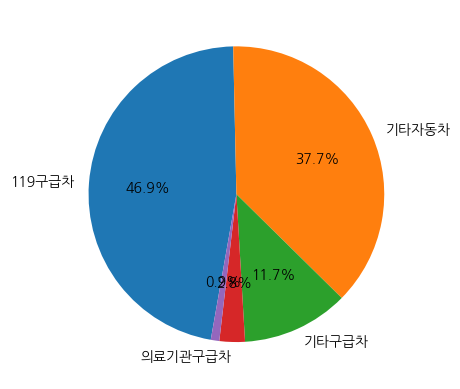

In [283]:
plt.rcParams['font.family'] = 'NanumGothic'

ratio = [0.46876715715160383,
 0.3772633067634031,
 0.11687128291657924,
 0.02779638215857448,
 0.009301871009839403]
labels = ['119구급차',
 '기타자동차',
 '기타구급차',
 '의료기관구급차',
 '']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

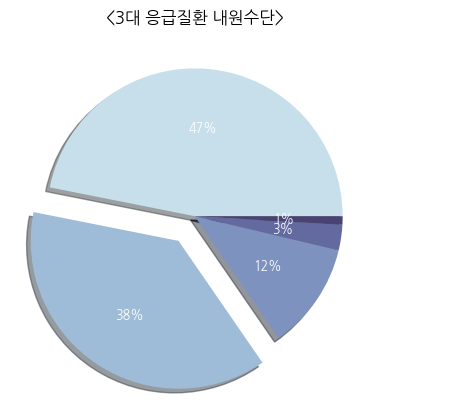

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# car sales data
ratio = [0.46876715715160383,
 0.3772633067634031,
 0.11687128291657924,
 0.02779638215857448,
 0.009301871009839403]
labels = ['119구급차',
 '기타자동차',
 '기타구급차',
 '의료기관구급차',
 '기타(도보, 항공 등)']
explode = [0, 0.2, 0, 0, 0]

# Seaborn color palette to plot pie chart
colors = sns.color_palette('ch:s=.25,rot=-.25')

# create pie chart using matplotlib
textprops = dict(rotation=0,size=9, weight=3,color="white")
plt.pie(ratio, labels=labels, colors=colors,
        autopct='%.0f%%', explode=explode, shadow=True, rotatelabels='True',textprops = textprops)
plt.title('<3대 응급질환 내원수단>')
plt.savefig('3대응급질환 내원수단.png',transparent=True)

In [31]:
plt.savefig('3대 응급질환 내원수단.')

<Figure size 640x480 with 0 Axes>

In [7]:
plt.rcParams['font.family'] = 'NanumGothic'

# 상급 종합병원 인구 1000명 당 병상 수 (시도별)

In [6]:
bed = pd.DataFrame({
    'location' : ['서울','대전','전주', '인천', '부산', '대구', '울산', '광주'],
    'rate' : [2.1, 1.7, 1.4, 1.3, 1.3, 1.3, 0.8, 0.6]
})
bed

,location,rate
0,서울,2.1
1,대전,1.7
2,전주,1.4
3,인천,1.3
4,부산,1.3
5,대구,1.3
6,울산,0.8
7,광주,0.6


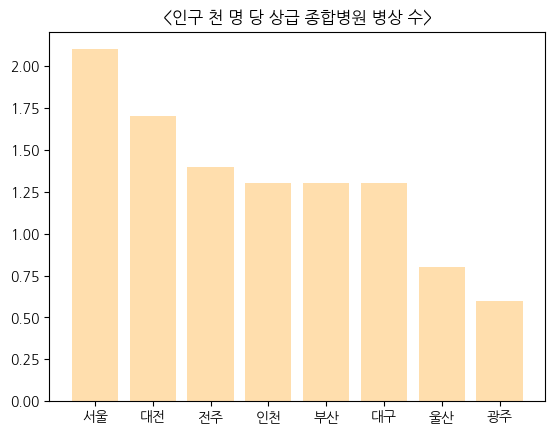

In [26]:
colors = sns.color_palette('ch:s=.25,rot=-.25')
plt.rcParams['font.family'] = 'NanumGothic'

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

x = np.arange(8)
plt.bar(x, bed.rate,color='navajowhite')
plt.xticks(x, bed.location)
plt.title('<인구 천 명 당 상급 종합병원 병상 수>')


plt.savefig('인구 천 명 당 상급 종합병원 병상 수.png',transparent=True)

plt.show()

In [16]:
np.arange(8)

array([0, 1, 2, 3, 4, 5, 6, 7])

# 재이송 사망률

In [293]:
a = pd.read_csv("public data contest/응급실에_내원한_응급환자의_사망장소_시도별__20221014031801.csv", encoding = 'cp949').set_index('지역별(1)',drop=True)
b = pd.read_csv("public data contest/응급진료결과_현황_시도별__20221014031345.csv", encoding = 'cp949')
c = pd.read_csv("public data contest/시·군·구별_연간_미충족의료율_병의원__20221014031405.csv", encoding = 'cp949')

In [110]:
death_place = a.rename(columns=a.iloc[0]).reset_index().drop([0], axis=0).rename(columns={'지역별(1)':'location'}).reset_index(drop=True)
death_place

,location,계,주택,의료기관,사회복지시설,공공시설,도로,상업서비스시설,산업장,농장,병원이송중,기타,미상
0,전체,117576,9871,101455,2796,70,311,323,85,68,1013,1534,50
1,서울,21153,2373,17279,666,18,42,90,20,3,186,470,6
2,부산,7016,359,6526,34,3,4,16,8,0,13,52,1
3,대구,6291,294,5875,55,3,7,9,2,1,24,20,1
4,인천,6187,582,5027,197,9,15,14,8,1,219,114,1
5,광주,2810,119,2637,4,2,9,16,3,1,5,13,1
6,대전,3041,240,2664,45,0,10,8,1,1,43,29,0
7,울산,1622,83,1511,6,0,1,8,0,0,3,10,0
8,세종,385,28,349,5,0,0,0,0,1,1,1,0
9,경기,25267,2397,21000,956,17,90,66,24,8,212,479,18


In [111]:
death_place["병원이송중"] = death_place["병원이송중"].astype(int)
death_place["계"] = death_place["계"].astype(int)

death_place["rate"] = death_place["병원이송중"] / death_place["계"]
death_place.sort_values('rate')

,location,계,주택,의료기관,사회복지시설,공공시설,도로,상업서비스시설,산업장,농장,병원이송중,기타,미상,rate
5,광주,2810,119,2637,4,2,9,16,3,1,5,13,1,0.001779
7,울산,1622,83,1511,6,0,1,8,0,0,3,10,0,0.001850
2,부산,7016,359,6526,34,3,4,16,8,0,13,52,1,0.001853
8,세종,385,28,349,5,0,0,0,0,1,1,1,0,0.002597
14,전남,5187,343,4687,69,2,16,6,3,5,16,35,5,0.003085
10,강원,5212,527,4389,176,2,17,12,3,4,17,63,2,0.003262
3,대구,6291,294,5875,55,3,7,9,2,1,24,20,1,0.003815
11,충북,3618,349,3056,138,5,11,14,3,3,14,25,0,0.003870
16,경남,7105,381,6570,40,1,6,16,5,6,28,49,3,0.003941
17,제주,2323,288,1895,60,2,15,7,1,5,10,39,1,0.004305


In [112]:
death_place = death_place.drop([0],axis=0).sort_values('rate').reset_index(drop=True)
death_place

,location,계,주택,의료기관,사회복지시설,공공시설,도로,상업서비스시설,산업장,농장,병원이송중,기타,미상,rate
0,광주,2810,119,2637,4,2,9,16,3,1,5,13,1,0.001779
1,울산,1622,83,1511,6,0,1,8,0,0,3,10,0,0.001850
2,부산,7016,359,6526,34,3,4,16,8,0,13,52,1,0.001853
3,세종,385,28,349,5,0,0,0,0,1,1,1,0,0.002597
4,전남,5187,343,4687,69,2,16,6,3,5,16,35,5,0.003085
5,강원,5212,527,4389,176,2,17,12,3,4,17,63,2,0.003262
6,대구,6291,294,5875,55,3,7,9,2,1,24,20,1,0.003815
7,충북,3618,349,3056,138,5,11,14,3,3,14,25,0,0.003870
8,경남,7105,381,6570,40,1,6,16,5,6,28,49,3,0.003941
9,제주,2323,288,1895,60,2,15,7,1,5,10,39,1,0.004305


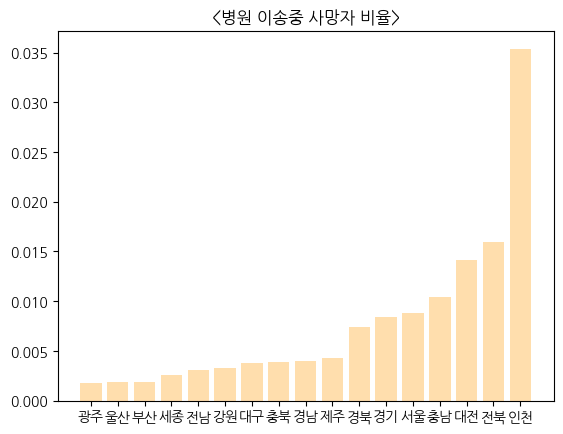

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

x = np.arange(17)
plt.bar(x, death_place.rate,color='navajowhite')
plt.xticks(x, death_place.location)
plt.title('<병원 이송중 사망자 비율>')


plt.savefig('병원 이송중 사망자 비율.png',transparent=True)

plt.show()

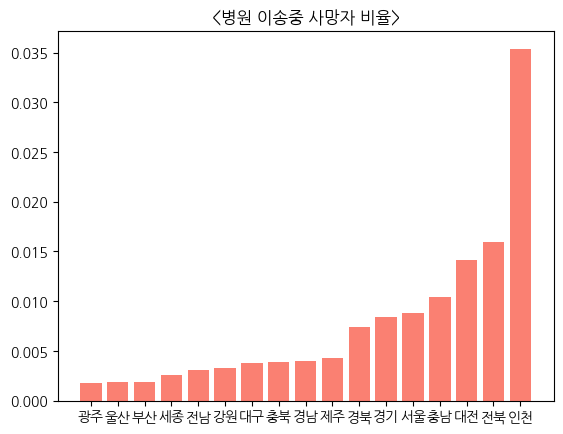

In [114]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

x = np.arange(17)
plt.bar(x, death_place.rate,color='salmon')
plt.xticks(x, death_place.location)
plt.title('<병원 이송중 사망자 비율>')


plt.savefig('병원 이송중 사망자 비율.png',transparent=True)

plt.show()

# 환자 응급진료 결과

In [183]:
em = b.drop([ '2020.2', '2020.3', '2020.4', '2020.5','2020.6', '2020.7', '2020.9', '2020.10', '2020.11', '2020.12','2020.13', '2020.14','2020.16', '2020.17', '2020.18', '2020.19', '2020.20','2020.22', '2020.23', '2020.24','2020.25', '2020.26', '2020.27', '2020.28', '2020.29', '2020.30'], axis=1).rename(columns=b.iloc[0]).drop([0,1], axis=0).rename(columns={'지역별(1)':'location'})
em

,location,합계,귀가,사망,입원,전원,기타,미상/미입력
2,충북,120027,85702,1748,30158,2014,277,128
3,충남,209273,160608,1609,39409,4956,2655,36
4,제주,128787,104859,735,21328,1538,312,15
5,전체,4644231,3440198,33238,1067693,78580,22070,2452
6,전북,232001,163683,1484,58303,4333,2861,1337
7,전남,105867,72740,942,28056,3202,833,94
8,인천,309621,228821,1835,70398,4898,3579,90
9,울산,68075,49286,356,17786,628,19,-
10,세종,10006,8006,29,1844,122,5,-
11,서울,1093564,831455,6447,227241,24274,3890,257


In [261]:
em_jb = em.reset_index(drop=True).iloc[[4]]
em_all =  em.reset_index(drop=True).iloc[[3]]

em1 = pd.concat([em_jb, em_all]).set_index('location').astype(int).reset_index().transpose().rename(columns={0:'전북'}).rename(columns={1:"전체"}).reset_index().drop([0],axis=0).set_index('index')
em1['전국의 비율'] = em1['전체'] / 4644231
em1['전북의 비율'] = em1['전북'] / 232001


em0 = em1.reset_index().drop([0,1,2,3,5,6],axis=0).drop(['전북','전체'],axis=1).set_index('index')
em0

,전국의 비율,전북의 비율
index,,
전원,0.01692,0.018677


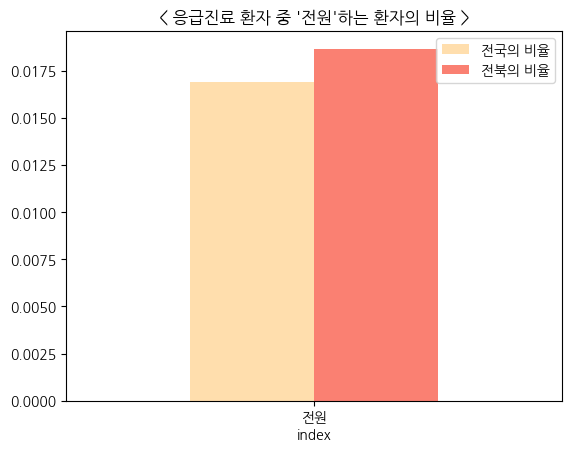

In [263]:
ax = em0.plot(kind='bar',  title="< 응급진료 환자 중 '전원'하는 환자의 비율 >", rot=0, color=['navajowhite','salmon'])

plt.savefig('응급진료 환자 중 전원하는 환자의 비.png',transparent=True)

In [271]:
trans_sub = b.rename(columns=b.iloc[0]).drop([0,1], axis=0).drop(['귀가','사망','입원','기타', '미상/미입력'], axis=1)
trans_sub.columns = ['location', 'all_patient','trans_sum', '병실부족', '중환자실 부족', '응급수술불가', '전문응급의료 요함', '경중으로 전원', '요양병원 전원', '환자사정으로 전원', '회송','기타']


trans_sub["all_patient"] = trans_sub["all_patient"].astype(int)
trans_sub["trans_sum"] = trans_sub["trans_sum"].astype(int)
trans_sub["rate"] = trans_sub["trans_sum"] / trans_sub["all_patient"]


trans_sub.sort_values('rate')

,location,all_patient,trans_sum,병실부족,중환자실 부족,응급수술불가,전문응급의료 요함,경중으로 전원,요양병원 전원,환자사정으로 전원,회송,기타,rate
13,대전,154941,733,23,117,189,82,-,16,234,37,35,0.004731
9,울산,68075,628,3,27,125,120,14,2,323,14,-,0.009225
18,경기,1093766,12171,829,770,1975,2885,235,214,4513,561,189,0.011128
4,제주,128787,1538,85,46,180,722,3,-,382,95,25,0.011942
10,세종,10006,122,-,11,32,43,-,-,28,1,7,0.012193
12,부산,206589,2543,63,34,473,532,128,179,814,253,67,0.012309
8,인천,309621,4898,70,110,303,886,136,35,2610,679,69,0.015819
19,강원,177957,2816,19,69,434,993,111,18,1075,82,15,0.015824
16,경북,195905,3140,8,103,577,1180,-,10,948,96,218,0.016028
15,광주,140056,2303,75,19,199,742,76,33,843,189,127,0.016443


In [273]:
trans_sub = b.rename(columns=b.iloc[0]).drop([0,1], axis=0).drop(['귀가','사망','입원','기타', '미상/미입력'], axis=1)
trans_sub.columns = ['location', 'all_patient','trans_sum', '병실부족', '중환자실 부족', '응급수술불가', '전문응급의료 요함', '경중으로 전원', '요양병원 전원', '환자사정으로 전원', '회송','기타']


trans_sub["all_patient"] = trans_sub["all_patient"].astype(int)
trans_sub["trans_sum"] = trans_sub["trans_sum"].astype(int)
trans_sub["rate"] = trans_sub["trans_sum"] / trans_sub["all_patient"]


trans_sub.sort_values('rate')
em00 = trans_sub.iloc[[4]].set_index('location').drop(['all_patient', 'trans_sum','rate'],axis=1)
em00

,병실부족,중환자실 부족,응급수술불가,전문응급의료 요함,경중으로 전원,요양병원 전원,환자사정으로 전원,회송,기타
location,,,,,,,,,
전북,66,24,380,2300,156,10,860,185,352


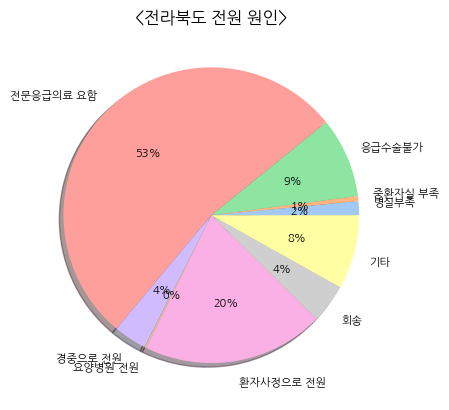

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns

# car sales data
ratio = em00.loc['전북']
labels = ['병실부족', '중환자실 부족', '응급수술불가', '전문응급의료 요함', '경중으로 전원', '요양병원 전원','환자사정으로 전원', '회송', '기타']

# Seaborn color palette to plot pie chart
colors = sns.color_palette('pastel')

# create pie chart using matplotlib
textprops = dict(rotation=0,size=8, weight=3,color="black")
plt.pie(ratio, labels=labels, colors=colors,
        autopct='%.0f%%', shadow=True, rotatelabels='True',textprops = textprops)
plt.title('<전라북도 전원 원인>')
plt.savefig('전원 이유.png',transparent=True)

# 이송중 사망 비율과 전원 환자 수 간의 상관관계 분석 (2017)

In [324]:
death_place = a.rename(columns=a.iloc[0]).reset_index().drop([0], axis=0).rename(columns={'지역별(1)':'location'}).reset_index(drop=True)
df1 = death_place[['location','계', '병원이송중']].drop([8],axis=0).reset_index(drop=True)
df1

,location,계,병원이송중
0,전체,117576,1013
1,서울,21153,186
2,부산,7016,13
3,대구,6291,24
4,인천,6187,219
5,광주,2810,5
6,대전,3041,43
7,울산,1622,3
8,경기,25267,212
9,강원,5212,17


In [432]:
b = pd.read_csv("public data contest/응급진료결과_현황_시도별__20221014050814.csv", encoding = 'cp949')
trans =b.drop([  '2017.2', '2017.3', '2017.4', '2017.5','2017.6', '2017.7',\
               '2017.9', '2017.10', '2017.11', '2017.12', '2017.13', '2017.14',\
               '2017.16', '2017.17', '2017.18', '2017.19', '2017.20',\
               '2017.22', '2017.23', '2017.24','2017.25', '2017.26', '2017.27', '2017.28', '2017.29', '2017.30','2017.31'], axis=1).\
rename(columns=b.iloc[0]).drop([0,1], axis=0).rename(columns={'지역별(1)':'location2'})
df2 = trans.reset_index(drop=True)
df2

,location2,합계,귀가,사망,입원,전원
0,전체,5591404,4275584,31121,1180367,88211
1,서울,1368390,1069787,7085,264201,22778
2,부산,208775,143477,1193,60531,2800
3,대구,225670,155920,2089,59593,7473
4,인천,371256,288426,1656,76143,4571
5,광주,164529,118022,938,42222,3036
6,대전,204628,148876,764,53780,1032
7,울산,81219,60216,269,20001,718
8,경기,1314645,1040546,6591,249748,14022
9,강원,202152,147928,1852,49042,3102


In [372]:
df = pd.concat([df1,df2],axis=1).loc[:, ['location', '병원이송중', '전원']].set_index('location').astype(int).reset_index().drop([0], axis=0)
df

,location,병원이송중,전원
1,서울,186,22778
2,부산,13,2800
3,대구,24,7473
4,인천,219,4571
5,광주,5,3036
6,대전,43,1032
7,울산,3,718
8,경기,212,14022
9,강원,17,3102
10,충북,14,2500


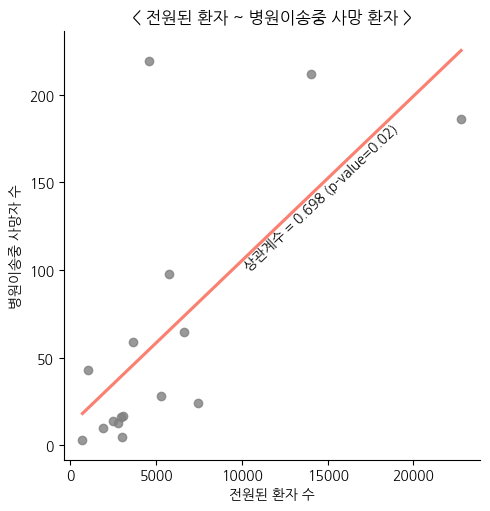

In [416]:
import matplotlib.pyplot as plt

colors = sns.color_palette('pastel')
ax = sns.lmplot(x= '전원', y='병원이송중', data=df,ci=None, scatter_kws={"color":"grey"}, line_kws={"color": "salmon"})
plt.text(10000, 100, "상관계수 = 0.698 (p-value=0.02)", color="black",rotation=43.5)
plt.title('< 전원된 환자 ~ 병원이송중 사망 환자 >')
plt.xlabel('전원된 환자 수')
plt.ylabel('병원이송중 사망자 수')

plt.savefig('상관관계.png',transparent=True,bbox_inches = 'tight')

### 상관계수 구하기

In [380]:
import scipy.stats as stats
X = df['전원']
Y = df['병원이송중']
stats.pearsonr(X,Y)

PearsonRResult(statistic=0.698278349565494, pvalue=0.0026252057899996935)

In [466]:
b = pd.read_csv("public data contest/응급진료결과_현황_시도별__20221014050814.csv", encoding = 'cp949')
trans =b.drop([  '2017.2', '2017.3', '2017.4', '2017.5','2017.6', '2017.7',\
               '2017.9', '2017.10', '2017.11', '2017.12', '2017.13', '2017.14',\
               '2017.16', '2017.17', '2017.18', '2017.19', '2017.20',\
               '2017.22', '2017.23', '2017.24','2017.25', '2017.26', '2017.27', '2017.28', '2017.29', '2017.30','2017.31'], axis=1).\
rename(columns=b.iloc[0]).drop([0,1], axis=0).rename(columns={'지역별(1)':'location2'})
df2 = trans.reset_index(drop=True).loc[:,['location2','합계', '전원']].drop([0],axis=0).set_index('location2').astype(int)
df2['rate'] = df2['전원']/df2['합계']
df2 = df2.sort_values('rate')

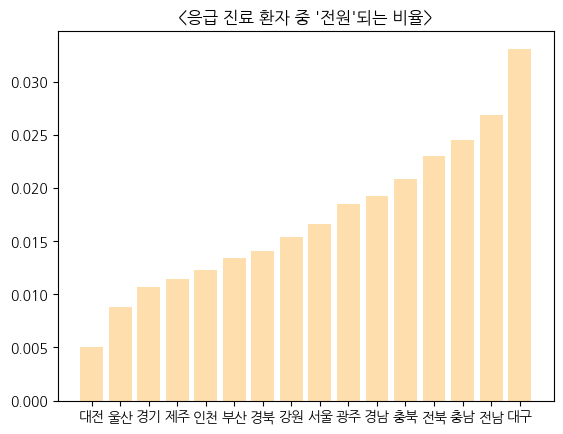

In [469]:
# 그래프 그리기
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

x = np.arange(16)
plt.bar(x, df2.rate,color='navajowhite')
plt.xticks(x, df2.index)
plt.title("<응급 진료 환자 중 '전원'되는 비율>")


plt.savefig('전원비율 비교 .png',transparent=True)

plt.show()

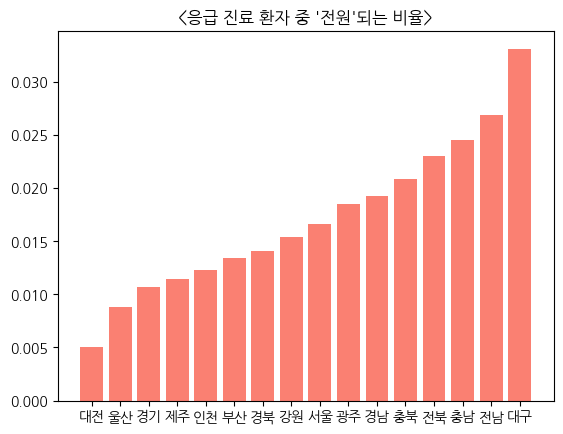

In [470]:
# 그래프 그리기
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

x = np.arange(16)
plt.bar(x, df2.rate,color='salmon')
plt.xticks(x, df2.index)
plt.title("<응급 진료 환자 중 '전원'되는 비율>")


plt.savefig('전원비율 비교 .png',transparent=True)

plt.show()

# 의료시스템 미충족의료율 (2021)

In [471]:
c

,시군구별(1),시군구별(2),시군구별(3),2021,2021.1,2021.2,2021.3,2021.4
0,시군구별(1),시군구별(2),시군구별(3),응답자수 (명),조율 (%),조율표준오차,표준화율 (%),표준화율표준오차
1,경상남도,남해군,소계,837,14.7,1.6,18.1,2.8
2,부산광역시,북구,소계,684,14.4,1.6,13.6,1.7
3,전라남도,곡성군,소계,809,12.9,1.4,13.2,2.2
4,전라남도,진도군,소계,841,12.7,1.9,16.1,2.4
...,...,...,...,...,...,...,...,...
283,경상남도,창녕군,소계,871,1.2,0.3,0.7,0.3
284,경상남도,통영시,소계,874,1.2,0.5,1.1,0.4
285,인천광역시,동구,소계,849,1,0.3,0.8,0.3
286,강원도,속초시,소계,835,1,0.4,1.1,0.4


In [500]:
non_med = c.rename(columns=c.iloc[0]).drop([0],axis=0).drop(['시군구별(3)'],axis=1).set_index(['시군구별(1)'])
non_med = non_med.rename(columns={'표준화율 (%)': 'adjusted_rate'}).rename(columns={'시군구별(2)': 'local'})
non_med

,local,응답자수 (명),조율 (%),조율표준오차,adjusted_rate,표준화율표준오차
시군구별(1),,,,,,
경상남도,남해군,837,14.7,1.6,18.1,2.8
부산광역시,북구,684,14.4,1.6,13.6,1.7
전라남도,곡성군,809,12.9,1.4,13.2,2.2
전라남도,진도군,841,12.7,1.9,16.1,2.4
경상남도,함양군,855,12.5,1.2,14,2.2
...,...,...,...,...,...,...
경상남도,창녕군,871,1.2,0.3,0.7,0.3
경상남도,통영시,874,1.2,0.5,1.1,0.4
인천광역시,동구,849,1,0.3,0.8,0.3


In [536]:
jeonju = non_med.query('local == "전주시"')
nation = non_med.query('local == "소계"').sort_values('adjusted_rate')
nonmed = pd.concat([jeonju, nation]).reset_index()

nonmed.loc[0,'시군구별(1)'] = '전주시' 
nonmed = nonmed.drop(['local'],axis=1).rename(columns={'시군구별(1)':'local'}).set_index('local').astype(float).sort_values(['adjusted_rate','표준화율표준오차'])
nonmed

,응답자수 (명),조율 (%),조율표준오차,adjusted_rate,표준화율표준오차
local,,,,,
제주특별자치도,4715.0,3.4,0.3,3.4,0.4
대구광역시,6735.0,3.5,0.3,3.5,0.3
대전광역시,4281.0,3.4,0.3,3.6,0.3
울산광역시,4025.0,3.7,0.3,3.8,0.4
서울특별시,21273.0,4.4,0.2,4.4,0.2
세종특별자치시,820.0,4.7,0.8,4.8,0.9
경기도,37984.0,4.7,0.1,4.9,0.1
경상북도,19971.0,4.9,0.2,5.0,0.3
충청북도,11465.0,5.3,0.3,5.4,0.3


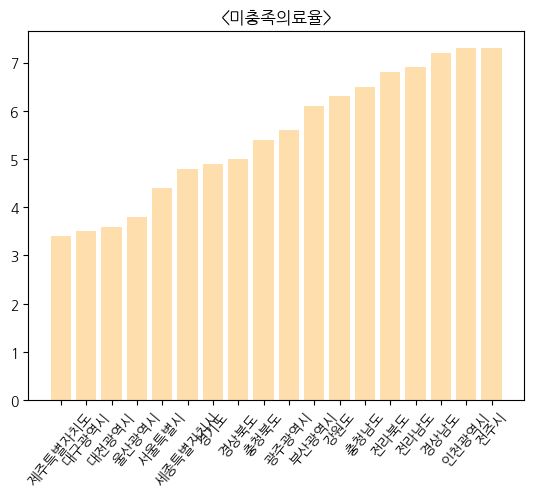

In [542]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

x = np.arange(18)
plt.bar(x, nonmed.adjusted_rate,color='navajowhite')
plt.xticks(x, nonmed.index,rotation=50)
plt.title("<미충족의료율>")


plt.savefig('미충족의료율.png',transparent=True,bbox_inches = 'tight')

plt.show()